In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
# This will supress the warnings that we may get with some seaborn graphs. 
# These warnings are due to different versions of matplotlib. 
# One version of a plot is being aged out, so we get a warning when using it. 
#import warnings
#warnings.filterwarnings("ignore", message="Numerical issues were encountered ")
 
import warnings
warnings.filterwarnings('ignore')

# Relationships Between Variables

One very iportant concept, especially for machine learning, is examining the relationship between two varaibles.
Take height and weight - as you look at taller people, they probably get heavier, but the relationship isn't exact. Danny DeVito is 4'8" and 194lb, NBA player Lonzo Ball is listed as 6'6" and 190lb! Clearly there's some variation in there.

We can analyze and measure the strength of these relationships of one varaible to another, and use that to better undertand our data, and do things like select varaibles for machine learning. 

A primary tool for examining these relationships is a scatter plot - one varaible on the X axis, the other on the Y, and a point for each value. The shape that all these points create will illustrate the relationship

##### Figure Size

Below is a global comand to change the default figure size. This make pyplot (which the other graphing libraries are largely built upon) draw its graphs at a default size of whatever this is. Once run, it will apply from that point on. 

<b>Note:</b> in the read_csv command there is another argument that tells the program that the data is not a "normal" csv. The Pandas reading functions are really good and adaptable, if you need to read some data that isn't a CSV, Google something like "Pandas read _______________ data". There is likely a function (e.g. read_excel) to use, or an argument to change that will make it work. 

In [3]:
plt.rcParams["figure.figsize"] = (12,7)

In [4]:
#Load hieght weight data. 
df = pd.read_csv("data/cardio_train.csv", sep=";")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
#Change the days into years, so it is more understandable
df["age"] = round(df["age"]/365, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


### Scatterplots

Scatterplots show one numerical varaible vs another, and we can see relationships between the two easily. 

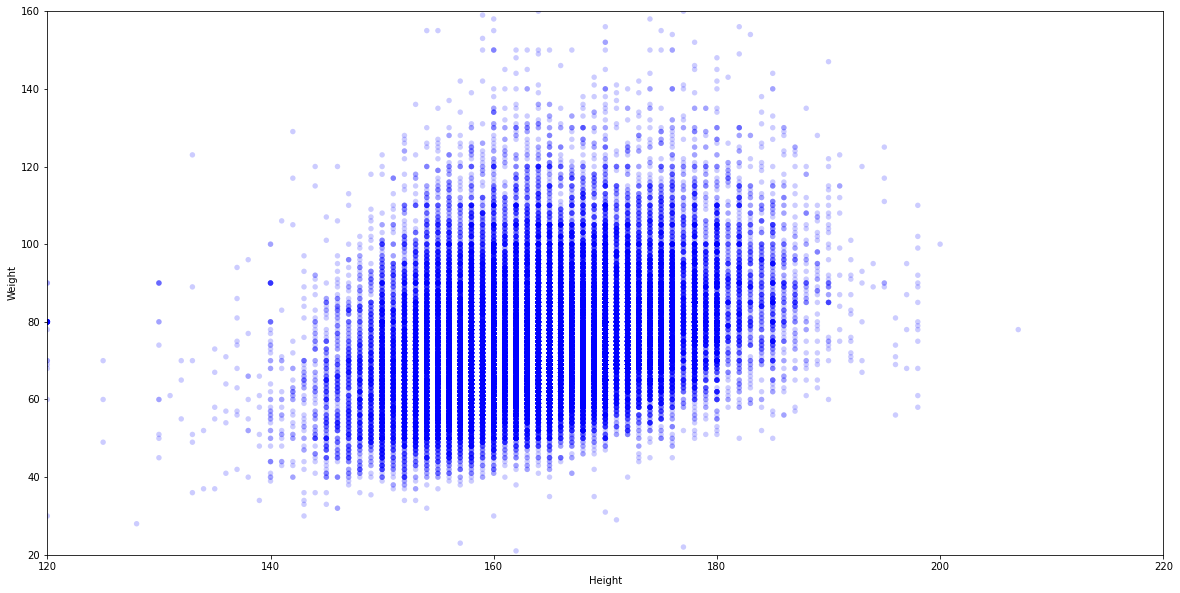

<Figure size 576x432 with 0 Axes>

In [7]:
#Create a scatterplot. Note scatterplots don't really need a preceeding object like a hist, it is just mapping points on a plot.
plt.rcParams["figure.figsize"] = (20,10)
thinkplot.Scatter(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])
plt.rcParams["figure.figsize"] = (12,7)

#### Jitter 

As people get taller, they get heavier. It isn't an extremely clear relationship though. When we are looking mainly at the relationship between two variables, and not so much at the exact values, we can do one (admittedly odd) thing to help our visualization - add random jitter to the points. This commonly occurs with data that is measured in integers, such as height. In most cases hieght or weight data is rounded to the inch/cm and kg/lb, so we get rows of data at each whole number with nothing in between. 

The jitter paramater moves each point some randomized small amount, not enough to change the pattern of the data, but enough to remove small clusters. If we compare to the above version we no longer have groupings on each inch of height. As with some of the other tricks we've seen, this jitter does actually change the data and make it "incorrect" - however, we are generally using the scatterplot to get an idea of if there is a correlation between the two variables, for this purpose the jitter can help us see the pattern with out negatively impacting anything we care about. 

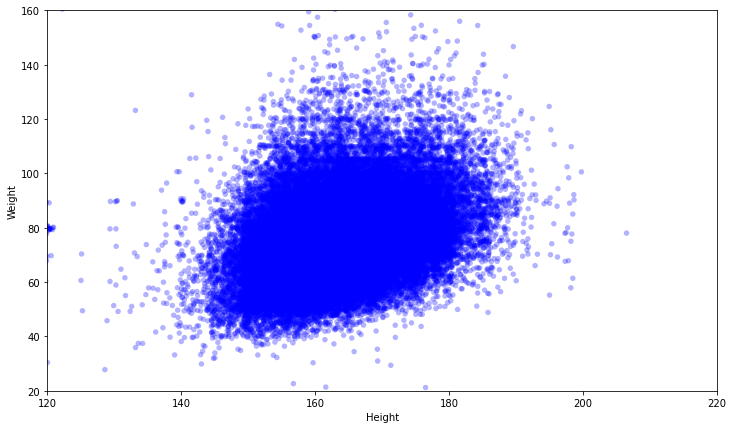

<Figure size 576x432 with 0 Axes>

In [8]:
#Add jitter
thinkplot.Scatter(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]), alpha=.3)
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

#### Hexbins

Another technique that can potentially make our scatter plots more clear is binning. Just like with regular binning, we are going to put our numeric varaiables into bins - this time it will be in two dimensions, each section of the 2D scatterplot is a 2D bin. 

This is another technique that can sometimes be usefull, in particular it can help us more clearly see when data is clustered around a few points. 

We'll see the same concept used later in heatmaps. 

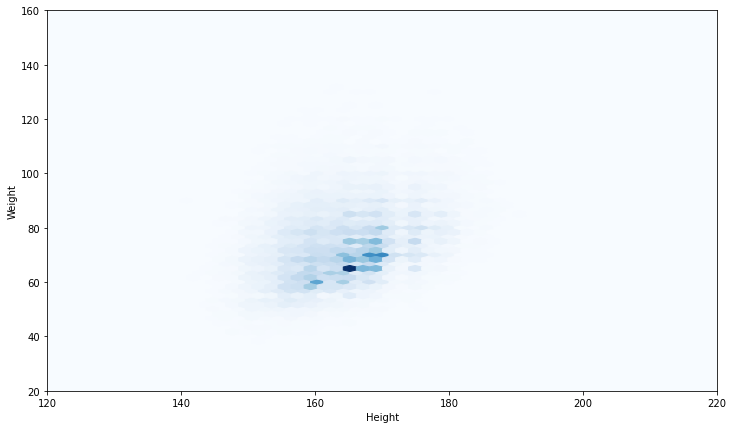

<Figure size 576x432 with 0 Axes>

In [9]:
#Hexbin
#thinkplot.HexBin(thinkstats2.Jitter(df["height"]), thinkstats2.Jitter(df["weight"]))
thinkplot.HexBin(df["height"], df["weight"])
thinkplot.Show(xlabel="Height", ylabel="Weight", axis=[120,220,20,160])

### Relationships and Correlation

All of these visualizations show the same basic thing - the relationship between height and weight. 

We can measure the strength of that relationship, that's called correlation. Correlation is how closely changes in variable X are seen in changes in variable Y. 

Correlation is a value between -1 and 1:
<ul>
<li> Correlation is 1 (or close): Everytime X increases, Y increases by a proportionate amount. 1 is perfectly (positively) correlated. 
<li> Correlation is -1 (or close): Everytime X increases, Y decreases by a proportionate amount. -1 is perfectly negatively correlated. 
<li> Correlation is 0 (or close): Changes in X indicate nothing about the value of Y. 0 is no correlation. 
<li> Otherwise: Most relationships we care about will have correlations in between 0 and -1 or +1. This indicates that there is some connection between the two variables (which helps us use one to predict the other), but that relationship isn't absolute. 
</ul>

![Correlation](images/correlation-examples.svg "Correlation")

<b>One big idea is that if things are correlated, one "tells us about" the other.</b>

In [10]:
#Calculate both correlation metrics
a=df["height"].values.tolist()
b=df["weight"].values.tolist()
thinkstats2.Corr(a, b), thinkstats2.SpearmanCorr(a,b)
#a,b

(0.2909678349914983, 0.3135692698998496)

### Pairplots

The pairplot is a very helpful tool when looking at distributions and correlations of several variables in a dataset all at once. The pairplot can often be something of a one stop shop for getting a quick preview of our data. Pairplots are also very easy to create, we basically just need to supply the dataframe of data and the function will do the rest. We can also specify color coding, and the graph will automatically split the data for us. This is ver useful later when doing machine learning, as we can split the data on the target (goal) variable; for example, if we had data to predict if someone was a customer or not, we can split the data by that customer varaible, and the patterns in the data would highlight if there appears to be a difference between the two groups. 

The seaborn documentation page on pairplots is here: https://seaborn.pydata.org/generated/seaborn.pairplot.html 

<b>Note:</b> For most of the things here, functions like a pairplot will automatically use the numeric columns of data and ignore the non-numeric ones. A .info() call can help identify if any are mislabeled. Then an .astype() can force it. This is often cause due to a non-numeric value in a numeric column, so you may find a need to filter the data sometimes, .to_numeric() can also help here, Google for its options. 

<b>Note 2:</b> This is one thing that can take a long time, especially if you have lots of data. Some things to speed it up are to ensure that any columns that you don't want/need are dropped, as well as taking a sample to plot (.sample(X_rows_to_sample)). In cases with a lot of data it is common to take a sample to run trials with, since it is faster, and drawing conclusions from that smaller sample. If we have millions of rows of data it may be impractical or impossible to do stuff like this with all the data, if we take a sample of 10,000 or so rows that will show the distributions and correlations fine, so we can build up our work from the sample, then when we get to the ends we can utilize all of the data. This type of process is very common later on in machine learning, especially when dealing with "big data" scenarios. The sample is "good enough" to work from, so we can save some time. 

In [11]:
#Cut down data to only numeric values, and fliter out some outliers. 
df2 = df[["age", "gender", "height", "weight", "ap_lo", "ap_hi"]]
df2 = df2[(df2["height"]>110) & (df2["height"] < 200)]

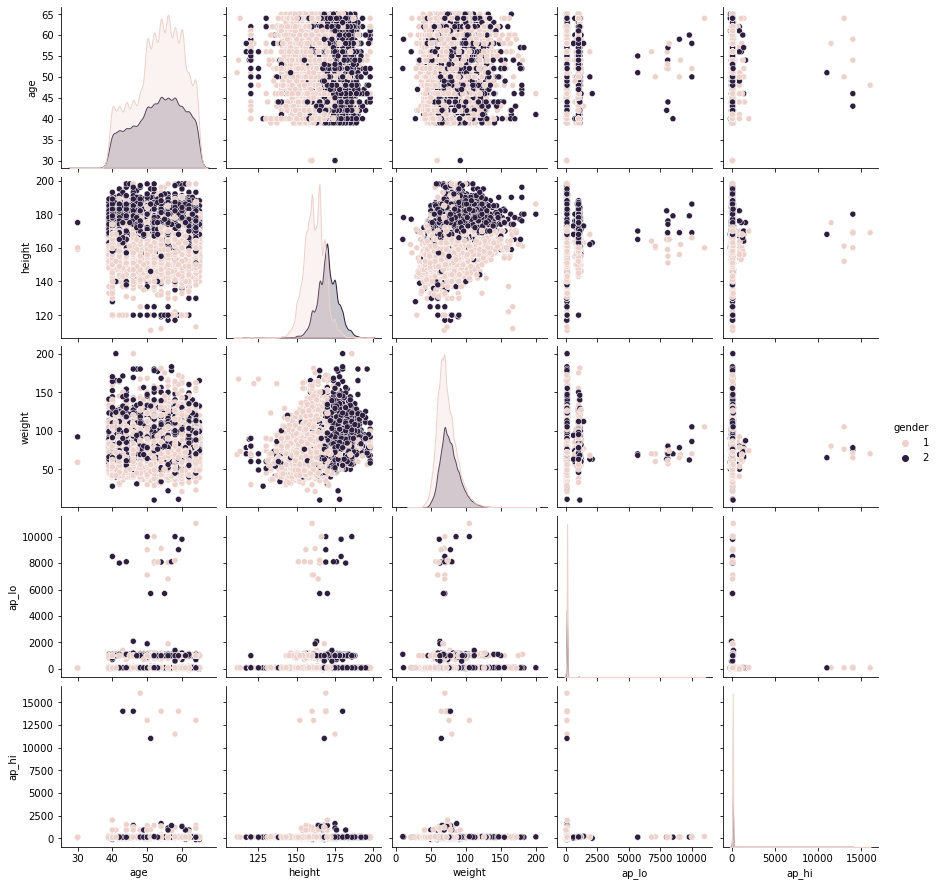

In [12]:
#Generate pairplot
sns.pairplot(df2, dropna=True, hue="gender")
plt.show()

##### Pairplot Findings

It looks like we have some serious outliers in the two ap columns, we will want to look at if those shoudl be excluded, I suspect so. We can also see that there doesn't really appear to be any significant difference in the distributions of the weight and age between the two groups. 

#### Regression Plot

A regression plot is a scatter plot, combined with a line of best fit, or a regresion line. A regression plot can automatically produce an indicator of the relationship between X and Y. The regression line, or line of best fit, is actually our first machine learning model! We'll see how some of those details get filled in towards the end of the semester. 

<b>Note:</b> In the example below jitter is added. The calculations for the regression line are done with the real data, the jitter only applies to the drawing part. 

<AxesSubplot:xlabel='height', ylabel='weight'>

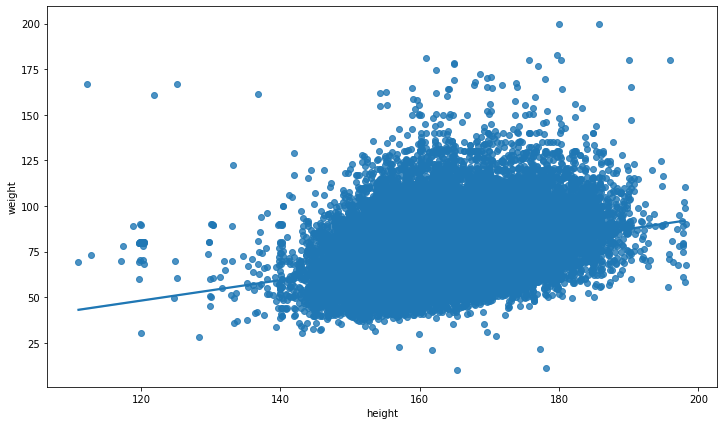

In [13]:
#Generate regression plot (pretty scatterplot with regression)
sns.regplot(x=df2["height"], y=df2["weight"], robust=True, data=df2, n_boot=1000, x_jitter=.4, y_jitter=.4, ci=85)

## Example 2 - Drugs

We can now load some different data, do some data cleanup, and look at correlations a bit more. 

In [14]:
#Load drug dataset and drop some values, so the total volume of data is manageable. 
drg = pd.read_csv("data/drug-use-by-age.csv")
drg = drg.drop(columns=["n", 'alcohol-frequency','marijuana-frequency', 'cocaine-frequency','crack-frequency', 'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency',
    'pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency', 'pain-releiver-use', 'stimulant-use'])
drg.head()

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,oxycontin-use,tranquilizer-use,meth-use,sedative-use
0,12,3.9,1.1,0.1,0.0,0.1,0.2,1.6,0.1,0.2,0.0,0.2
1,13,8.5,3.4,0.1,0.0,0.0,0.6,2.5,0.1,0.3,0.1,0.1
2,14,18.1,8.7,0.1,0.0,0.1,1.6,2.6,0.4,0.9,0.1,0.2
3,15,29.2,14.5,0.5,0.1,0.2,2.1,2.5,0.8,2.0,0.3,0.4
4,16,40.1,22.5,1.0,0.0,0.1,3.4,3.0,1.1,2.4,0.3,0.2


#### Pariplots++

Pairplots can also have the regression line displayed en masse with a simple argument. The shaded area represents the error (more on that in a couple of weeks) of the regression line, the higher the correlation, the tighter the shaded area is to the line. In other words, the less error there is, the better the model (regression line) is at modelling (representing), the emperical data (the dots). 

Add in <i>kind="reg"</i> as an argument in the pairplot to add in the regression part. 

In [15]:
#Generate pairplot


#### Pairplot Findings

There are a lot of preliminary conclusions that we can draw from the data graph above. Some things that I can see are:
<ul>
<li> Crack use distribution - crack consumption seems to be bimodal (it has two peaks - or modes). People either do a lot of crack, or near 0 crack. There seems to be very few moderate crack users. 
<li> Cannabis and hallucinogenics are very highly correlated. This means that as someone smokes more weed, they also tend to do more hallucinogens - and vice versa. One is a good "predictor" of the other. 
<li> Inhalents look to be less correlated with other drug uses than the others. This means that other drug usage tends to be a poor indicator of inhalent usage, they aren't tied (correlated) to each other. For example, knowing someone does meth gives you virtually no information about their inhalent use. On the other hand, knowing someone's meth consumption gives a good idea of their use of tranquilizers, as those two have a strong correlation. 
</ul>

Are there any other things that we can learn from the plot?

### Correlation Tables

The pairplot gives us a quick visual look at correlations between our varaibles. Correlation is soemthing that is generally very easy to see visually, but we can also calculate it easily. The corr() function takes our dataframe of data, and generates a crosstab table of the correlations between each pair of variables. 

You'll notice that the correlation values on the table are the same on either side of the diagonal "spine". The correlation of alcohol and cocaine use is the same as the correlation between cocaine use and alcohol. 

In [16]:
#Take the data in our dataframe, and change it into a set of correlations. 
drg2 = drg.apply(pd.to_numeric, errors='coerce')
drg2 = drg2.drop(columns=["age"])
drg2 = drg2.corr()
drg2.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,oxycontin-use,tranquilizer-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.589219,0.735785,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.971733,0.935199,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.865626,0.920430,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.603003,0.772651,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.775321,0.818583,0.816620,0.333649


#### Heatmaps and Correlation

The table above has very useful data, but we need to present it in a way that is useful. Data 3350 tells us that in order for our analytics to be used, we need to present it in a way that is friendly to the user; the above table-o-numbers is anything but. There are many things that could be done, but one that is common and simple is a heatmap - or color coding the values according to their magnitude. Since correlation is always normalized (on a 0 to 1 scale), the color scaling allows us to ver simply see high and low correlations. 

<b>Note:</b> the "mask" part is what causes the second half to be left out. This is something that can be Googled and reused, it isn't special to our data. 

<b>Note 2:</b> there are a bunch of arguments in the heatmap function call below. Each one does a little configuration to the look of the graph. We usually have a situation like this - we can make a simple graph by just using the function, then optionally add additional stuff to make it look how we want. 

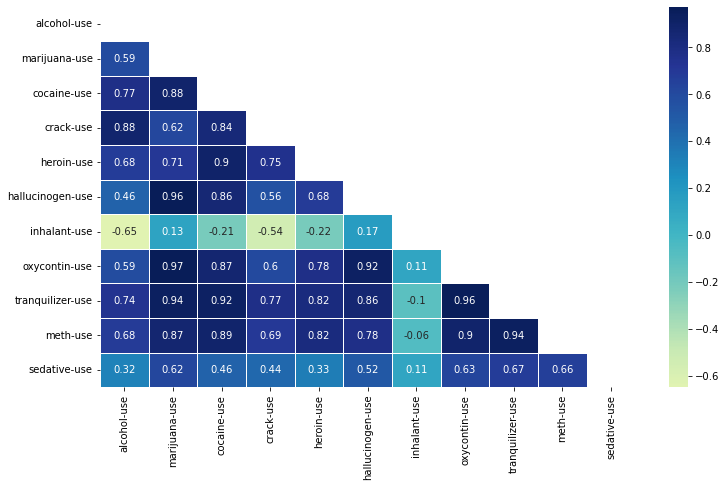

In [17]:
#Show Correlations in heatmap
mask = np.triu(np.ones_like(drg2, dtype=bool))
sns.heatmap(drg2, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Exercise

We can use our newfound correlation skills to look at something near and dear to my heart, and my dead pancreas - diabetes! In this data we have a bunch of common values that are tracked for diabetic people, the Outcome varaible is a measure of if that person has diabetes. 

<b>We will do some exploring of the data, with a loose goal of looking at Glucose differences between diabetics and regular folk.</b>

## Part 1: Load and Explore Data

Load some data and take a preview. Look for correlations visually and calculate some that appear to be correlated numerically. 

I have a couple of cleanup steps:
<ul>
<li> Remove glucose readings of 0. You are dead if your blood glucose is literally 0, so this is probably an error. 
<li> Change the units of the glucose readings into mmol/L, which is the standard. The original data is in 'Murican.
</ul>

In [18]:
#Read Diabetic Data and change to mmol/L, ditch 0 glucose (errors)
d = pd.read_csv("data/diabetes.csv")
d["Glucose"] = d["Glucose"]/18.018
d = d[d["Glucose"] > 0]
d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,8.214008,72,35,0,33.6,0.627,50,1
1,1,4.717505,66,29,0,26.6,0.351,31,0
2,8,10.156510,64,0,0,23.3,0.672,32,1
3,1,4.939505,66,23,94,28.1,0.167,21,0
4,0,7.603508,40,35,168,43.1,2.288,33,1


In [19]:
#Describe data
d.describe(include="all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,6.753622,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,1.694730,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,2.442002,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,5.494505,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,6.493506,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,7.825508,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,11.044511,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Examine data visually for both correlation and distribution. 

In [20]:
#Look for correlations visually


#### Calculate Some Higher Correlations

There are a few correlations that we can see above. We can try calculating both the Pearson and Spearman correlations for them. 

In [21]:
#Calculate some correleations


## Part 2: Refine and Clean Data

Remove any outliers in the data that aren't useful, then refine our examination. This time, add: hue="Outcome" as an argument in the pairplot to allow us to also look at differences between diabetics and non-diabetics. 

One thing jumped out there - there are several things with 0 or near 0 values that don't make sense, e.g. Blood Pressure - 0 blood pressure = 0 life expectancy. We will take what we found from our first look at the data, apply some cleanup, and do the pairplot again to see what things look like now. There are also a few random outliers I'll get rid of now. 

In [22]:
#Filter out 0s. Rerun graphs. 
d = d[d["BloodPressure"] > 0]
d = d[d["SkinThickness"] > 0]
d = d[d["BMI"] > 0]

# Filter outliers
d = d[d["SkinThickness"] < 80]
d = d[d["BMI"] < 50]

In [23]:
#Look for correlations visually post cleaning


#### Pairplot Findings

Our data looks pretty good now. There appears to be a few outliers, such as skin thickness, but for the most part things look usable now. At a first look, diabetic people appear to really differ mainly on the distribution of their blodd glucose. This is in line with expectations, as having poor glucose control is diabetes in a nutshell. 

As well, some things like blood pressure, skin thickness, and BMI are all seemingly somewhat higher for diabetics, though not as dramatically as glucose. 

## Part 3: Examine Distribution of Glucose 

That cleans up our data a little. Since this data is about a glucose test, we can detour to examine glucose more closely...

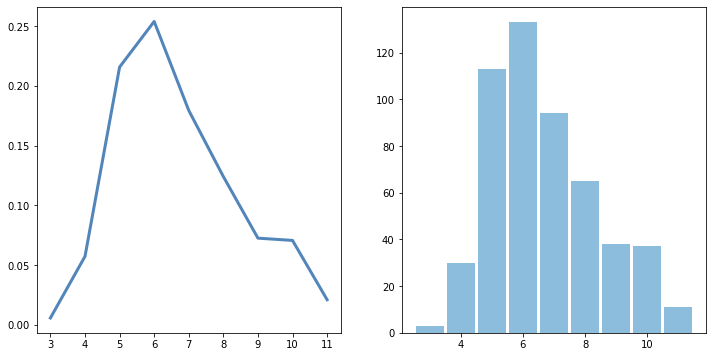

In [24]:
#Look at glucose overall first. 
thinkplot.PrePlot(2,1,2)
pmf = thinkstats2.Pmf(round(d["Glucose"], 0))
thinkplot.Pdf(pmf)
thinkplot.SubPlot(2)
hist = thinkstats2.Hist(round(d["Glucose"],0))
thinkplot.Hist(hist)
thinkplot.Config()

##### Split Data

Since we are looking at diabetes, it likely makes sense to explore if there is any notable difference between diabetics and non-diabetics. We can use the "col" argument here to auto-split our data to take a quick look at if there is a difference here. 

In the split pairplot above we saw that the glucose looks to be the "most different" between the two groups. 

<b>Note:</b> Here I am using the built in splitting in the graph that comes with the "col" argument. I split the data into separate dataframes below. 

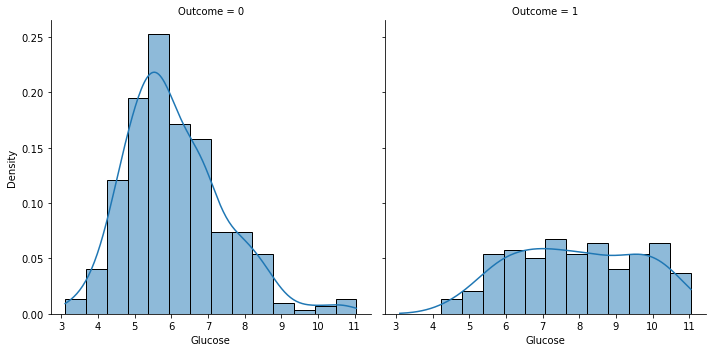

In [25]:
#Split by if you're diabetic or not. 
sns.displot(data=d, x="Glucose", kde=True, col="Outcome", stat="density")

#### Results

It looks like there is a pretty clear difference between the glucose readings for diabetics and non-diabetics. We can explore each on its own. 

## Part 4: Explore Non-Diabetics - Build Analytical Distribution

In the data above we can see that there are two, potentially substantially different, subsets of our data. Since these two gorups look like they may be different, we can take a look at the two subsets separately. Take non diabetic people and create analytical distribution for them. 

Whoa! Way different. Diabetic people are in shambles and normal people are... well... normal. We can take our normal people and treat them as normal - quick detour into analytical distributions....

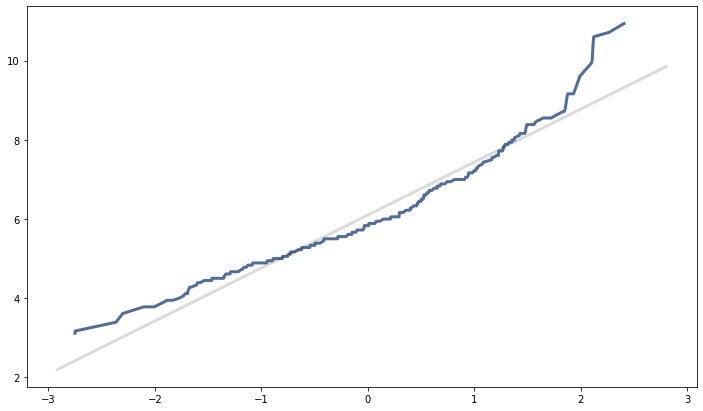

In [26]:
#Non-Diabetic people are normal!
d_neg = d[d["Outcome"]==0]
thinkstats2.NormalProbabilityPlot(d_neg["Glucose"])

The normal probability plot looks pretty good (ish, we'll try others as well soon). Why don't we make an analytical distribution out of our data? (We'll look at other distributions in a moment). 

In [27]:
# Create a normal distribution. Because we have stated "it is normal", we only need mean and std to define it. 
norm = ss.norm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std())
# Print some stats from the new distribution. 
norm.median(), norm.mean()

(6.095258219904113, 6.095258219904113)

In [28]:
#Create a histogram - We will take our new distribution and create some random values mirroring that


By doing what we just did there, we effectively said - this is the distribution of glucose for non-diabetics, it is defined by this formula. The "ss.norm..." generates that formula if you provide mean and std. We can use that new analytical model to do stuff, like graph....

What may be concerning about that...?

## Part 5: More Analytical Distributions

Our distribution is more or less normal, but not perfect. Maybe we should consider the skew, and try to make it more accurate?

#### Skewnorm Distribution

Our data appears to be skewed, perhaps we can model it with a skewnorm distribution. This is another one that comes from scipy. For the normal distribution we needed the mean and standard devitation as the inputs to create an analytical distribution. Here we need to add one more, the skew. Luckily we can calculate it via our trusty functions. 

![Skewnorm](images/skewnorm.png "Skew Normal")

<b>Note:</b> this distribution could also probably be represented pretty well with a log-normal distribution. The skewed normal distribution is very similar, we'll play with it here. In reality, I suspect that each could model this ditribution in a pretty similar way. 

In [29]:
#What about muh skew?
#Skewnorm is another distribution - a normal one with some skew. We calculate it, and pass it to our distribution with a=
a = thinkstats2.PearsonMedianSkewness(d_neg["Glucose"])
norms = ss.skewnorm(loc=d_neg["Glucose"].mean(), scale=d_neg["Glucose"].std(), a=a)
norms.mean(), norms.std()

(6.554757503597172, 1.2601734992800588)

#### Skew-Stylez and Parametric

One thing to note here is the skew calculation. We looked at a couple - Pearson and Spearman. The details of skew calculations is well beyond the level of detail we have to care about here, but long-story-short, there are several calculations of skew: https://en.wikipedia.org/wiki/Skewness. The Pearson Median Skew is one that attempts to be "non-parametric", or one that does not make assumptions about the distribution of the underlying data. Below, we can calculate it along with "regular" skew. This is another example of the usefullness of normality, the other skew calculations lean on assumptions of the normality of the data - from the wikipedia page, "Under the assumption that the underlying random variable {\displaystyle X}X is normally distributed...".

The parametric vs non-parametric idea is one that will stick with us. If we can assume that the data matches a distribution (usually normal) closely enough, then we can use things "built upon" that assumption - like some skew calculation. If it doesn't match that distribution, we need a different approach. There's a trade-off between durability (the ability to be used on any dataset), and suitability (the ability to tailor the results to our exact example). 

<b>Note:</b> We will generally stick with the thinkstats calculations of skew, since it makes it much easier to work with textbook stuff. We don't really have scenarios where you'll need to choose between skews calculations and have the results matter. Being aware that we can calculate skew differently is sufficient. In practice, if you needed to do this in real life, you'd probably use the scipy one. 

In [30]:
print(a)
print(ss.skew(d_neg["Glucose"]))
print(d_neg["Glucose"].skew())

0.47539305211061883
0.7662759212498108
0.769549830516728


#### Fitting an Analytical Distribution

We can also just tell the system to figure it out for us.... The fit function does just what it says, it will take the data and fit the analytical distribution as best as it can. 

The syntax for this is a little odd, what we are doing is:
<ul>
<li> Running the fit function will return a set of values defining the shape of our curve. For this one they are skew, mean, and standard deviation; for different distributions the values returned may differ. 
<li> Create an analytical distribution with the results of the fit function. (W.R.T. the values returned from fit, we don't <b><i>really</i></b> need to know what they are if we are just plugging them in here)
<li> The result is a distribution object, that we can use just like the normal ones we've created. 
</ul


In [31]:
#Create a model that is fitted to the data, automagically.
ae, loce, scalee = ss.skewnorm.fit(d_neg["Glucose"])
snormFit = ss.skewnorm(ae, loce, scalee)
snormFit.mean(), snormFit.std()


(6.103693931141683, 1.3297137430351538)

##### Plot the Distributions

We can look at the distributions plotted together, and see how they differ from the emperical data. 

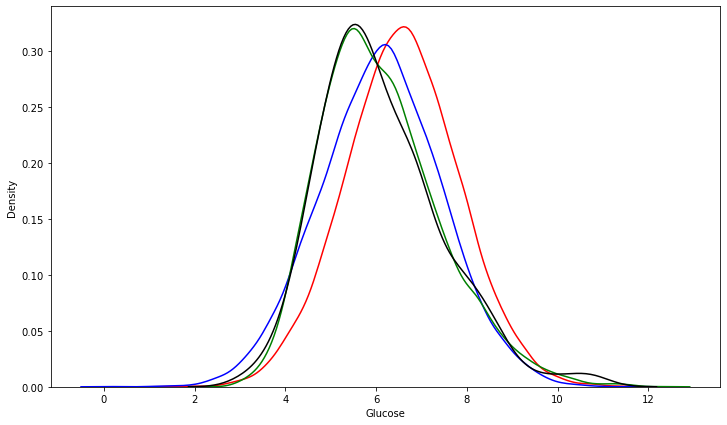

In [32]:
#Plot all the distributions together. 
sns.distplot(norms.rvs(size=10000), color="red", hist=False)
sns.distplot(norm.rvs(size=10000), color="blue", hist=False)
sns.distplot(snormFit.rvs(size=10000), color="green", hist=False)
sns.distplot(d_neg["Glucose"], color="black", hist=False)
plt.show()

##### Graphing Results

We can see the different distributions and how they line up with the original data. Each gives an approximation of the data in our sample. To no surprise, the distribution that has been fitted algorithmically is the closest match.

Once we have an analytical distribution that mirrors our data closely enough, we can use it. Some caveats:
<ul>
<li>The more data we have, the more likely we are able to make an accurate model. Generalizing from a small amount of data is more risky. 
<li>The closer the distribution is to the distribution you pick, the better. Many are normal, but not all.  
<li>Does our sample realistically match the population we are modelling? For us, this data comes from a glucose tolerance test, which is one way that doctors diagnose diabetes. You're given a glass of orange juice, then your blood sugar is measured 2 hours later. If it is really high, you're probably diabetic. Most people who have no medical issues wouldn't do this, so we probably should expect our data to be different than the total population. 
</ul>

<b>Think - are there any scenarios where a perfectly matching analytical distribution may not be desired?</b>

#### How Many are Healthy?

We can take any of the distributions of our data, and use it for distribution type of activities, such as doing percentile/cdf calculations. Here we can calculate how many of the glucose scores landed in a healthy range. 

A normal glucose value is between 3.9 and 5.4 for a helthy person without eating. 

In [33]:
#How many people have a blood glucose in an optimal range (3.9-5.4)
low = 3.9
high = 5.4

cdfNeg = thinkstats2.Cdf(d_neg["Glucose"])

print("Normal Distribution:", norm.cdf(high)-norm.cdf(low))
print("Skew Distribution:", norms.cdf(high)-norms.cdf(low))
print("Fitted Distribution:", snormFit.cdf(high)-snormFit.cdf(low))
print("Emperical CDF:", cdfNeg.Prob(high)-cdfNeg.Prob(low))

Normal Distribution: 0.25125821250818314
Skew Distribution: 0.16270426499880988
Fitted Distribution: 0.3108933509965088
Emperical CDF: 0.311614730878187


#### Correlations for Non-Diabetics

Before we leave our healthy friends, we can look at the correlations in the data. 

<b>Think:</b> I'd argue that the age and pregnancies correlation isn't very meaningful in this data. Do you agree? 

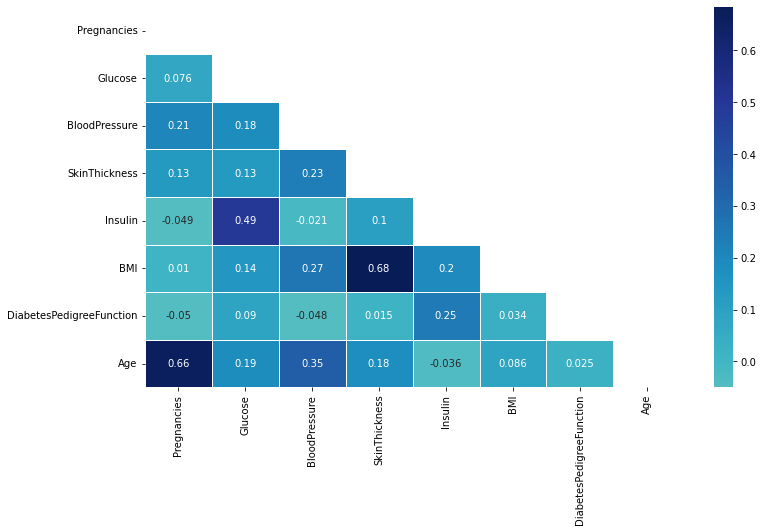

In [34]:
#Plot correlation matrix
mask = np.triu(np.ones_like(d_neg.drop(columns=["Outcome"]).corr(), dtype=bool))
sns.heatmap(d_neg.drop(columns=["Outcome"]).corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

## Part 6: Dead Pancreas Society

Enough with the disease free elitists, we can go back to looking at diabetics.

For people with diabetes, inspect for correlations. 

In [35]:
# Separate diabetic people
d_pos = d[d["Outcome"] == 1]

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

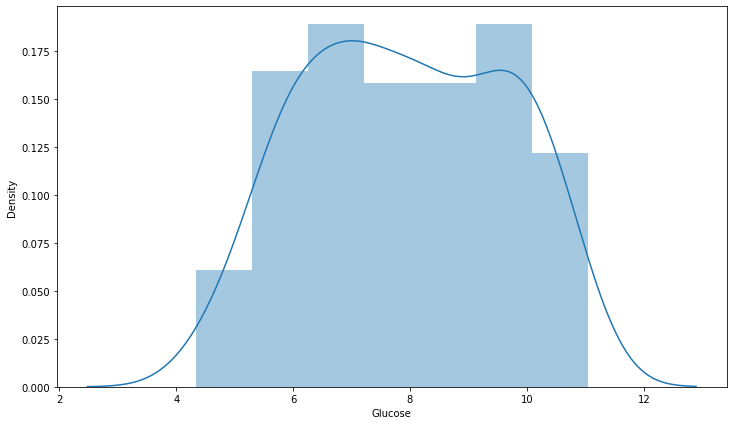

In [36]:
sns.distplot(d_pos["Glucose"])

##### Diabetic Glucose Distribution

We can try to match this one to a uniform distribution - one that is the same accross the range. This isn't a perfect match, but we can give it a try and use it to do the same thing as above - estimate the number of glucose results in the healthy range. The uniform distribution documentation is here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html, of note, we only have two things that matter here:
<ul>
<li> loc - the mean, or here the "only" value for the distribution. 
<li> scale - the "span" of the distribution. It defaults to a 0 to 1 range, our data is roughly 4 to 10. 
</ul>

We can create one that is fitted to the data and see if we feel that it is a reasonable match. 

4.329004329004329 6.715506715506715


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

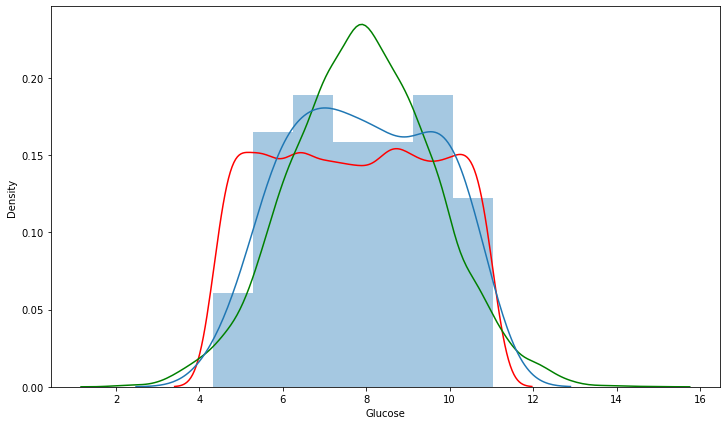

In [37]:
#Create a model that is fitted to the data, automagically.
locu, scaleu = ss.uniform.fit(d_pos["Glucose"])
unifFit = ss.uniform(locu, scaleu)
print(locu, scaleu)

# "Dummy" normal distribution to compare
tempLoc, tempScale = ss.norm.fit(d_pos["Glucose"])
temp = ss.norm(tempLoc, tempScale)

#Plot
sns.distplot(unifFit.rvs(size=10000), color="red", hist=False)
sns.distplot(temp.rvs(size=10000), color="green", hist=False)
sns.distplot(d_pos["Glucose"])


And now the health calculations... How many people are in the 3.9 to 5.4 range, using each distribution. 

In [38]:
# CDF calculations

We can see some weird results here, since the analytical distribution isn't perfect. The dummy normal delivers "better" results here, but that seems to hold only for that one section of the distribution, if we were to edge higher, the normal distribution separates wildly. On the far left of the uniform distribution we see the source of the error, the uniform "stays up" around 5 or so, where the emperical data dips. 

The theoretical best match for this data seems to be a distribution that is uniform in the middle, and steps down at either end. We don't have a distribution like that queued up, so we either need to find a better match or deal with compromising. I.e. if we were attempting to generalize from this sample to the population as a whole, we don't have a great model right now. 

##### Diabetic Glucose Distributions and Correlations

Diabetic people don't seem to have a nice normal-y distribution for their glucose. This is very different from the non-diabetics. Here this would likely be better modeled with an extremely "squished" distribution that follows a normal shape (normal, lognormal, skewnorm, etc...), a uniform distribution (a flat line), or some other one that we don't have at hand. 

First, we can look to see, are there any strong correlations (or anything in the distribution patterns) in the data. 

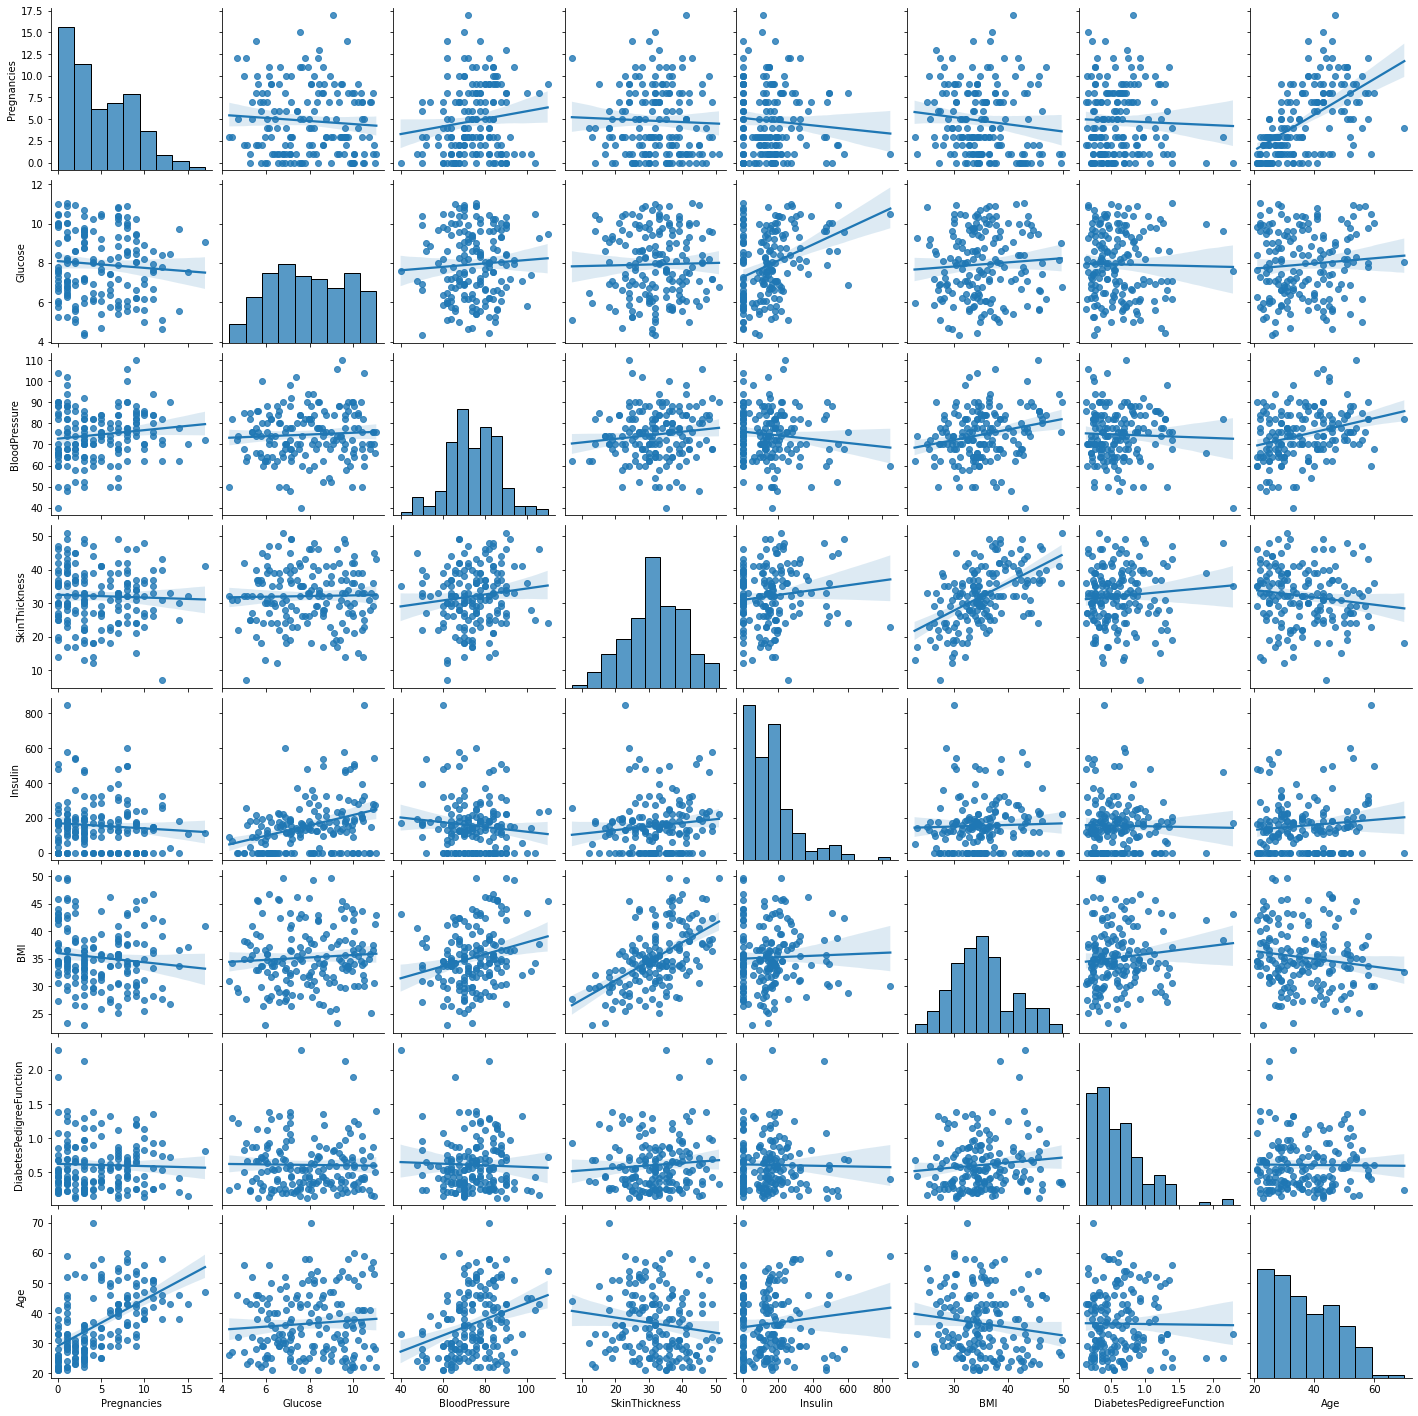

In [39]:
#Take diabetic people and look for correlations
sns.pairplot(d_pos.drop(columns="Outcome"), dropna=True, kind="reg")
plt.show()

## Part 7: Correlation Matrix for Diabetics. 

We can generate a heatmap showing the correlations in our data. 

In [40]:
#Create correlation dataframe


In [41]:
#Plot correlation matrix


One thing to note here - glucose and insluin are <b><i>less</i></b> correlated in diabetics. That makes some sense, as insulin is nolw manual, rather than automatic via a pancreas. 